## TITANIC
***

# 1. Importing Librabries

In [1]:
#linear algebra
import numpy as np

#data processing
import pandas as pd

#data visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import os
os.chdir("D:/kaggle/titanic")

# 2. Gathering Data

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# 3. Data Exploration/Analysis

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [8]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Text(10.049999999999997, 0.5, 'Survived')

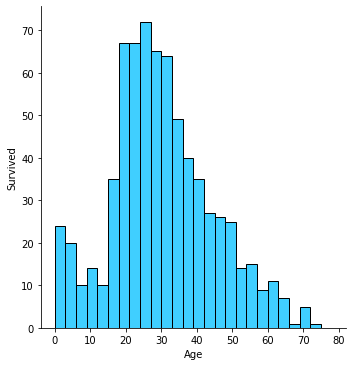

In [9]:
sns.displot(train['Age'].dropna().values, bins=range(0, 81, 3), kde=False, color="#00BFFF")
plt.xlabel("Age")
plt.ylabel("Survived")

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

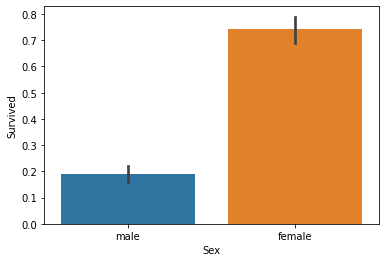

In [10]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

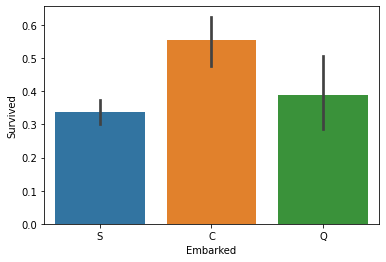

In [11]:
sns.barplot(x='Embarked', y='Survived', data=train)

# 4. Data preprocesing & Featuring

In [12]:
train=train.drop(['PassengerId'],axis=1)

In [13]:
train= train.drop(['Cabin'],axis=1)
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [14]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)

In [15]:
train.Age.isnull().sum()

0

In [16]:
dataset = [train, test]

for data in dataset:
    data['Age'] = data['Age'].astype(int)
    data.loc[ data['Age'] <= 18, 'Age'] = 0
    data.loc[(data['Age'] > 18) & (data['Age'] <= 28), 'Age'] = 1
    data.loc[(data['Age'] > 28) & (data['Age'] <= 40), 'Age'] = 2
    data.loc[(data['Age'] > 40) & (data['Age'] <= 66), 'Age'] = 3
    data.loc[ data['Age'] > 66, 'Age'] = 4


In [17]:
train.Age.value_counts()

1    285
2    277
0    165
3    157
4      7
Name: Age, dtype: int64

In [18]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)


In [20]:
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [21]:
train.Embarked.value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [22]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [23]:
train.Fare.head(6)

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
Name: Fare, dtype: float64

In [24]:
dataset = [train,test]

for data in dataset:
    data['Fare'] = data['Fare'].fillna(0)
    data['Fare'] = data['Fare'].astype(int)

In [25]:
train.Fare.max()

512

In [26]:
for data in dataset:
    data.loc[ data['Fare'] <= 7, 'Fare'] = 0
    data.loc[(data['Fare'] > 7) & (data['Fare'] <= 15), 'Fare'] = 1
    data.loc[(data['Fare'] > 15) & (data['Fare'] <= 30), 'Fare']   = 2
    data.loc[(data['Fare'] > 30) & (data['Fare'] <= 100), 'Fare']   = 3
    data.loc[(data['Fare'] > 100) & (data['Fare'] <= 250), 'Fare']   = 4
    data.loc[ data['Fare'] > 250, 'Fare'] = 5
    data['Fare'] = data['Fare'].astype(int)

In [27]:
dataset = [train, test] 
sex = {"male" : 0, "female" : 1}

for data in dataset:
    data["Sex"] = data["Sex"].map(sex)

In [28]:
train=train.drop(['Ticket'],axis=1)

In [29]:
dataset = [train,test]

for data in dataset:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.')
pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [30]:
title = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for data in dataset:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')   

for data in dataset:
    data['Title'] = data['Title'].map(title)
    data['Title'] = data['Title'].fillna(0)

In [31]:
train.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,3,1,3
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,0,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,3,0,3
4,0,3,"Allen, Mr. William Henry",0,2,0,0,1,0,1
5,0,3,"Moran, Mr. James",0,2,0,0,1,2,1


In [32]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [33]:
dataset = [train,test]

for data in dataset:
    data['FamilySize'] = data['SibSp'] +  data['Parch'] + 1

for data in dataset:
    data['IsAlone'] = 0
    data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1


In [34]:
train = train.drop(['SibSp'], axis=1)
train = train.drop(['Parch'], axis=1)

In [35]:
train = train.drop(['FamilySize'], axis=1)
train.head(6)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,0,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1
5,0,3,0,2,1,2,1,1


In [36]:
test = test.drop(['Ticket'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [37]:
test = test.drop(['SibSp'], axis=1)
test = test.drop(['Parch'], axis=1)
test = test.drop(['FamilySize'], axis=1)
test.head(6)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,1,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,1,1,2,1,1
3,895,3,0,2,1,0,1,1
4,896,3,1,2,1,0,3,0
5,897,3,0,2,1,0,1,1


# 5. Machine Learning Models

In [38]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

#X_train.shape, y_train.shape, X_test.shape


### Logistic Regression

In [39]:
#clf = LogisticRegression()
#clf.fit(X_train, y_train)
#y_pred_log_reg = clf.predict(X_test)
#acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
#print (str(acc_log_reg) + ' percent')

### K-Nearest Neighbors

In [48]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

80.25


### Random Forest

In [44]:
#clf = RandomForestClassifier(n_estimators=100)
#clf.fit(X_train, y_train)
#y_pred_random_forest = clf.predict(X_test)
#acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
#print (acc_random_forest)

In [47]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_knn
    })
submission.to_csv('submissionKNN.csv', index=False)